<a href="https://colab.research.google.com/github/su872/suba/blob/main/weather_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

Importing libaries

NUMPY:Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these array

PANDAS:Pandas are most widely used for data science/data analysis and machine learning


SciPy is a python library that is useful in solving many mathematical equations and algorithms.

SEABORN: Seaborn library is a widely popular data visualization library that is commonly used for data science and machine learning

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import regex as re
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor



from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor



In [ ]:
df=pd.read_csv("/content/seattle-weather.csv")

In [ ]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
df.describe()

precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.sample(6)

date  precipitation  temp_max  temp_min  wind weather
950   2014-08-08            0.0      25.6      13.3   2.9     sun
1422  2015-11-23            3.0       6.7       0.0   1.3    rain
1101  2015-01-06            0.0      12.2       6.1   1.3     fog
493   2013-05-08            0.0      19.4      11.1   1.9     sun
1414  2015-11-15           22.4       8.9       2.2   4.1    rain
1319  2015-08-12            7.6      28.3      16.7   2.7    rain

In [ ]:
df["date"]=pd.to_datetime(df["date"])

In [ ]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

<ipython-input-26-fcd63b3a5240>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


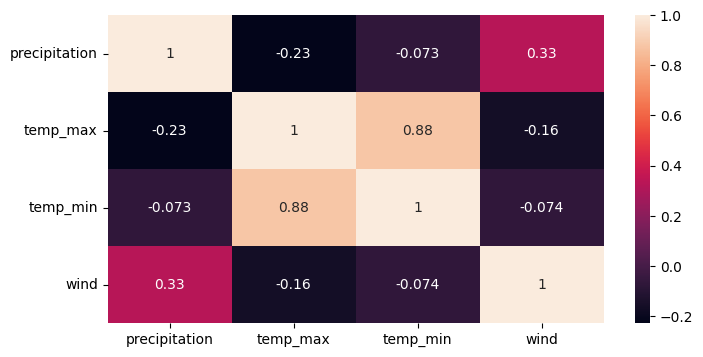

In [ ]:

cor=df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot=True)
plt.show()

Correlation is a highly applied technique in machine learning during data analysis

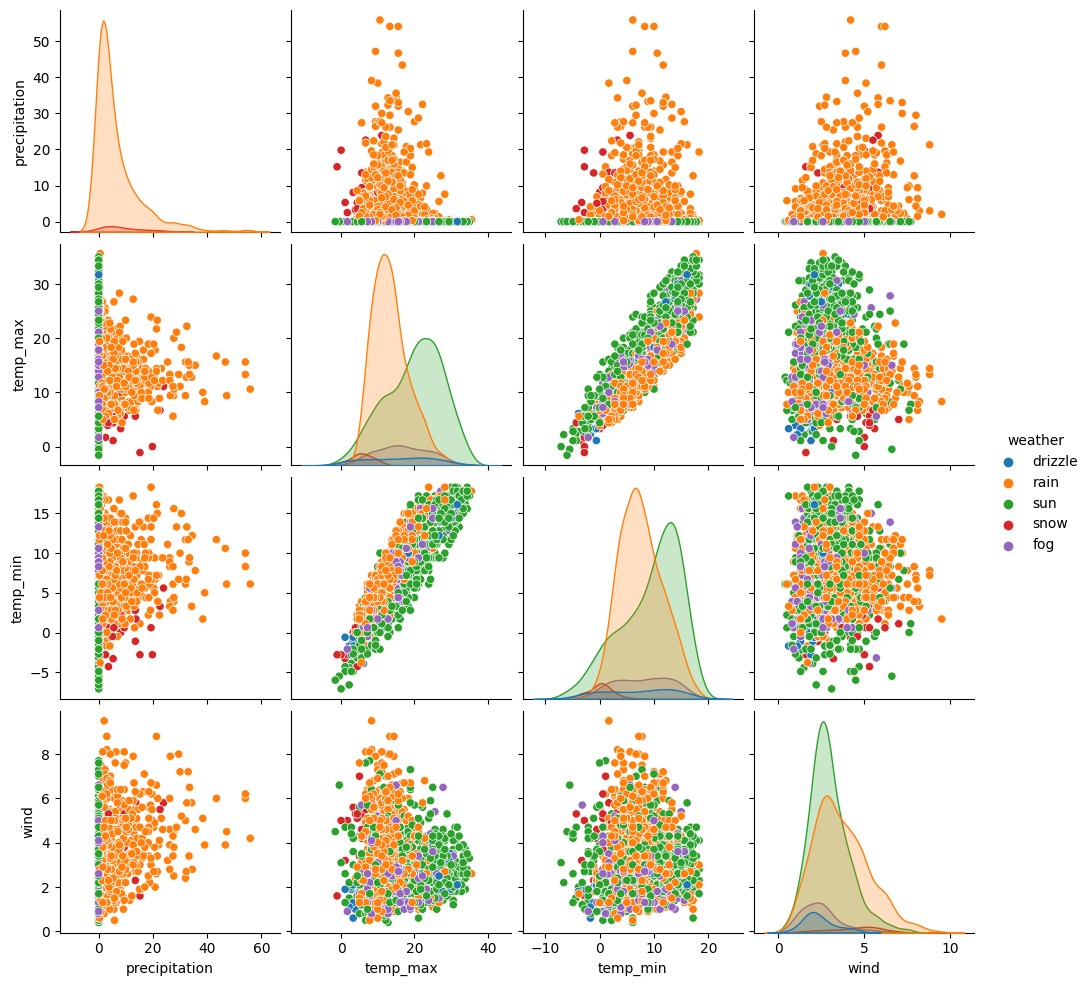

In [ ]:
sns.pairplot(data=df, hue='weather')
plt.show()

In [ ]:
max_temp = df.groupby(by='weather')['temp_max'].mean().reset_index()
px.bar(max_temp, 'weather', 'temp_max',color="weather",title="Avg of Max temp for each type")

In [ ]:
min_temp = df.groupby(by='weather')['temp_min'].mean().reset_index()
px.bar(min_temp, 'weather', 'temp_min',color="weather",title="Avg of Min temp for each type")


In [ ]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].apply(lambda x: x.strftime('%B'))

In [ ]:
df['Year'].unique()

array([2012, 2013, 2014, 2015])

In [ ]:
Year = sorted(set(df["Year"]))
fig=go.Figure()
region_plot_names = []
buttons=[]
default_year = 2012
for region_name in Year:
    region=df[df["Year"]==region_name].groupby(by=["Year","Month"])["wind"].mean().reset_index()

    fig.add_trace(go.Bar(x=region["Month"], y=region["wind"],visible=(region_name==default_year)))

    region_plot_names.extend([region_name])

for region_name in Year:
    buttons.append(dict(method='update',
                        label=region_name,
                        args = [{'visible': [region_name==r for r in region_plot_names]}]))

# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons, "direction": "down", "active": Year.index(default_year)}])
fig.update_layout(xaxis_title="wind", yaxis_title="Year")
fig.show()

In [ ]:
df.replace(to_replace ="rain", value = 2, inplace = True)
df.replace(to_replace ="drizzle", value = 3, inplace = True)
df.replace(to_replace ="fog", value = 4, inplace = True)
df.replace(to_replace ="sun", value = 5, inplace = True)
df.replace(to_replace ="snow", value = 1, inplace = True)
df


date  precipitation  temp_max  temp_min  wind  weather  Year  \
0    2012-01-01            0.0      12.8       5.0   4.7        3  2012   
1    2012-01-02           10.9      10.6       2.8   4.5        2  2012   
2    2012-01-03            0.8      11.7       7.2   2.3        2  2012   
3    2012-01-04           20.3      12.2       5.6   4.7        2  2012   
4    2012-01-05            1.3       8.9       2.8   6.1        2  2012   
...         ...            ...       ...       ...   ...      ...   ...   
1456 2015-12-27            8.6       4.4       1.7   2.9        2  2015   
1457 2015-12-28            1.5       5.0       1.7   1.3        2  2015   
1458 2015-12-29            0.0       7.2       0.6   2.6        4  2015   
1459 2015-12-30            0.0       5.6      -1.0   3.4        5  2015   
1460 2015-12-31            0.0       5.6      -2.1   3.5        5  2015   

         Month  
0      January  
1      January  
2      January  
3      January  
4      January  
...        ...  
1456  December  
1457  December  
1458  December  
1459  December  
1460  December  

[1461 rows x 8 columns]

SPLITING AND CHECKING ACCUARCY OF DATA

In [ ]:
X = df.drop(columns=['weather',"Month","Year",'date'])
y = df['weather']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score,mean_absolute_error

***LINEAR REGRESSION MODEL  Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.46167566828592077
MAE 0.8910122466837543


KNeighborsRegressorModel: KNN  is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [ ]:
model1 = KNeighborsRegressor(n_neighbors=3)
model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6163054484558165
MAE 0.5164960182025028
